<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/Bagging_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/iris.csv'

df=pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['variety'] = encoder.fit_transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[df['variety'] != 0][['sepal.width','petal.length','variety']]
df.head()

,sepal.width,petal.length,variety
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


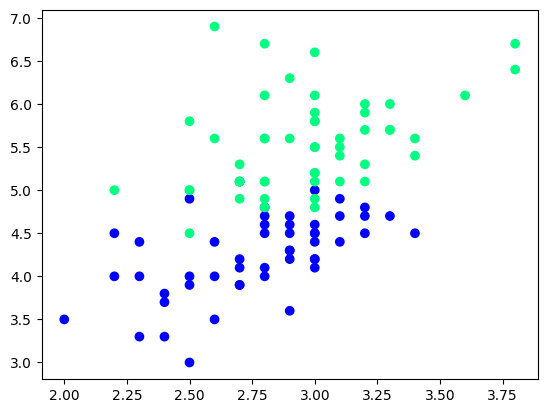

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['sepal.width'],df['petal.length'],c=df['variety'],cmap='winter')

In [8]:
# taking only 10 rows for training
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [9]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

Case 1 - Bagging

In [10]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal.width,petal.length,variety
110,3.2,5.1,2
58,2.9,4.6,1
76,2.8,4.8,1
110,3.2,5.1,2
72,2.5,4.9,1
81,2.4,3.7,1
74,2.9,4.3,1
81,2.4,3.7,1


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [14]:
dt_bag1 = DecisionTreeClassifier()

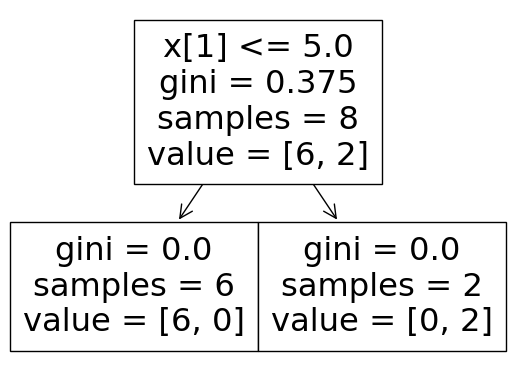

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


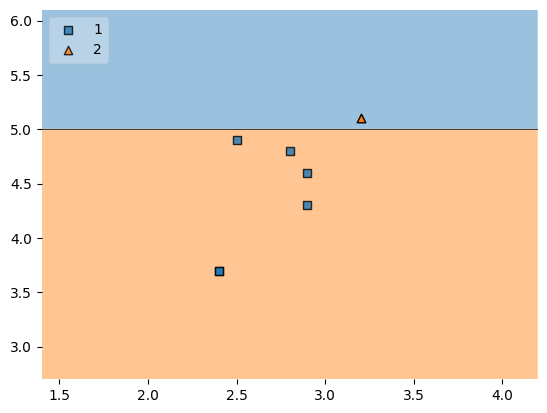

In [17]:
evaluate(dt_bag1,X,y)

In [16]:
def evaluate (clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf=clf,legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))


In [18]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal.width,petal.length,variety
115,3.2,5.3,2
76,2.8,4.8,1
116,3.0,5.5,2
58,2.9,4.6,1
115,3.2,5.3,2
116,3.0,5.5,2
110,3.2,5.1,2
115,3.2,5.3,2


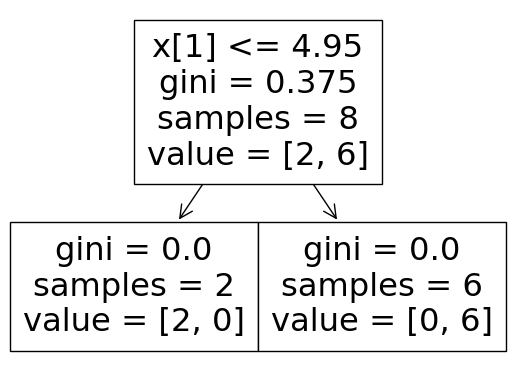

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


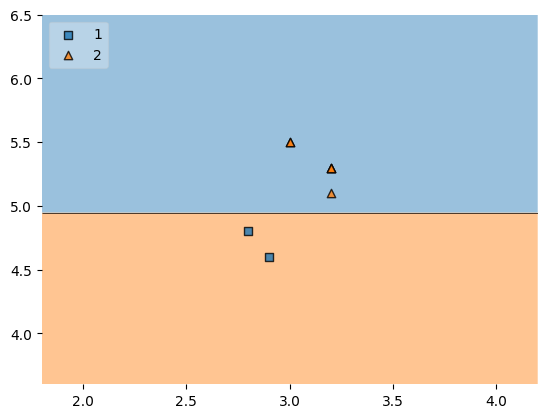

In [19]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [20]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal.width,petal.length,variety
115,3.2,5.3,2
74,2.9,4.3,1
58,2.9,4.6,1
110,3.2,5.1,2
72,2.5,4.9,1
58,2.9,4.6,1
115,3.2,5.3,2
76,2.8,4.8,1


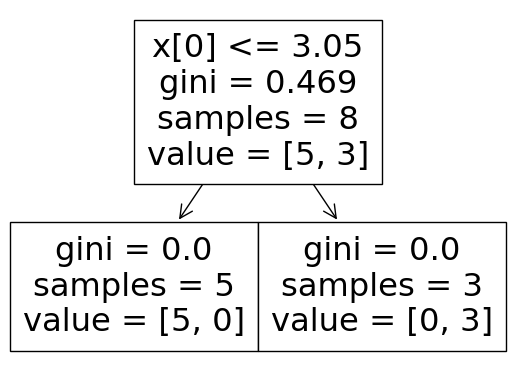

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


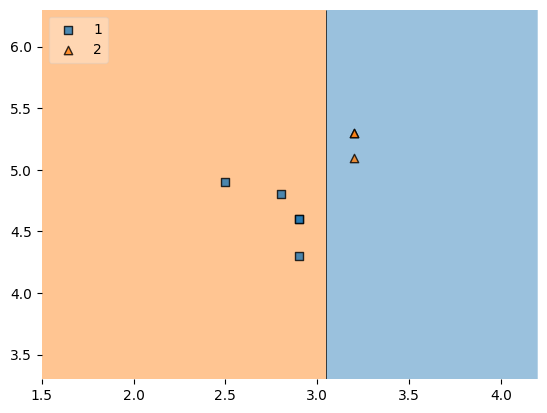

In [21]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

Predict

In [22]:
df_test

,sepal.width,petal.length,variety
100,3.3,6.0,2
131,3.8,6.4,2
93,2.3,3.3,1
57,2.4,3.3,1
70,3.2,4.8,1


In [23]:
print("Predictor 1", dt_bag1.predict(np.array([3.3,6.0]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.3,6.0]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([3.3,6.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
